In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests


# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8362f4de456c9922690c291dccdb6ed3


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pionerskiy
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bom jesus da lapa
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | japura
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | solnechnyy
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | tual
Processing Record 15 of Set 1 | lipari
Processing Record 16 of Set 1 | ostrov
Processing Record 17 of Set 1 | zhigalovo
Processing Record 18 of Set 1 | canon city
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | thunder bay
Processing Reco

Processing Record 36 of Set 4 | sandy bay
Processing Record 37 of Set 4 | puerto del rosario
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | soyo
Processing Record 41 of Set 4 | ouadda
Processing Record 42 of Set 4 | beaufort
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | danielskuil
Processing Record 45 of Set 4 | andenes
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | vizianagaram
Processing Record 48 of Set 4 | peruibe
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | pocone
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | north platte
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | camocim
Processing Record 6 of Set 5 | aljezur
Processing Record 7 of Set 5 | hurghada
Processing Record 8 of Set 5 | havelock
Processing Record 9 of Set 5 | adrar
Processing Record 1

Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | gomel
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | nagato
Processing Record 32 of Set 8 | pimentel
Processing Record 33 of Set 8 | birao
Processing Record 34 of Set 8 | okhotsk
Processing Record 35 of Set 8 | eyl
Processing Record 36 of Set 8 | batemans bay
Processing Record 37 of Set 8 | benguela
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | maumere
Processing Record 40 of Set 8 | tecoanapa
Processing Record 41 of Set 8 | plouzane
Processing Record 42 of Set 8 | bilma
Processing Record 43 of Set 8 | borogontsy
Processing Record 44 of Set 8 | amuntai
Processing Record 45 of Set 8 | dahuk
Processing Record 46 of Set 8 | kieta
Processing Record 47 of Set 8 | zhanaozen
Processing Record 48 of Set 8 | brae
Processing Record 49 of Set 8 | west bay
Processing Record 50 of Set 8 | sumbawa
City not found. Skipping...
Processing Re

Processing Record 14 of Set 12 | bundibugyo
Processing Record 15 of Set 12 | barcelos
Processing Record 16 of Set 12 | salalah
Processing Record 17 of Set 12 | poum
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | salisbury
Processing Record 20 of Set 12 | nyuksenitsa
Processing Record 21 of Set 12 | kuragino
Processing Record 22 of Set 12 | hefei
Processing Record 23 of Set 12 | alofi
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | fort nelson
Processing Record 26 of Set 12 | lolua
City not found. Skipping...
Processing Record 27 of Set 12 | uruzgan
Processing Record 28 of Set 12 | agbor
Processing Record 29 of Set 12 | leh
Processing Record 30 of Set 12 | taltal
Processing Record 31 of Set 12 | ciras
City not found. Skipping...
Processing Record 32 of Set 12 | eureka
Processing Record 33 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 34 of Set 12 | ola
Processing Record 35 of Set 12 | jinxi
Processing Re

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pionerskiy,54.9508,20.2275,40.84,83,21,9.53,RU,2021-11-16 21:37:13
1,Bredasdorp,-34.5322,20.0403,62.28,87,92,3.74,ZA,2021-11-16 21:37:13
2,Hermanus,-34.4187,19.2345,62.91,80,92,6.64,ZA,2021-11-16 21:37:13
3,Busselton,-33.6500,115.3333,57.09,78,97,10.16,AU,2021-11-16 21:37:13
4,Bom Jesus Da Lapa,-13.2550,-43.4181,76.19,68,99,7.65,BR,2021-11-16 21:37:14
5,Khatanga,71.9667,102.5000,-34.02,100,25,3.22,RU,2021-11-16 21:37:14
6,Saint George,37.1041,-113.5841,75.67,23,1,1.01,US,2021-11-16 21:37:14
7,Japura,-0.3167,102.3500,74.32,96,93,0.89,ID,2021-11-16 21:37:15
8,Solnechnyy,50.7214,136.6319,11.25,83,5,4.05,RU,2021-11-16 21:37:15
9,Cape Town,-33.9258,18.4232,65.26,68,0,9.22,ZA,2021-11-16 21:37:15


In [92]:
#reorder the columns
new_column_order_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
df_new_order = city_data_df[new_column_order_df]
df_new_order

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pionerskiy,RU,2021-11-16 21:37:13,54.9508,20.2275,40.84,83,21,9.53
1,Bredasdorp,ZA,2021-11-16 21:37:13,-34.5322,20.0403,62.28,87,92,3.74
2,Hermanus,ZA,2021-11-16 21:37:13,-34.4187,19.2345,62.91,80,92,6.64
3,Busselton,AU,2021-11-16 21:37:13,-33.6500,115.3333,57.09,78,97,10.16
4,Bom Jesus Da Lapa,BR,2021-11-16 21:37:14,-13.2550,-43.4181,76.19,68,99,7.65
...,...,...,...,...,...,...,...,...,...
563,Bonavista,CA,2021-11-16 21:52:01,48.6499,-53.1147,45.12,76,72,30.53
564,Saint-Joseph,RE,2021-11-16 21:52:01,-21.3667,55.6167,73.78,81,30,5.30
565,Zalantun,CN,2021-11-16 21:52:02,48.0000,122.7167,22.44,90,60,3.27
566,Kaeo,NZ,2021-11-16 21:52:02,-35.1000,173.7833,71.33,77,95,9.17


In [93]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [94]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/17/21'

In [95]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

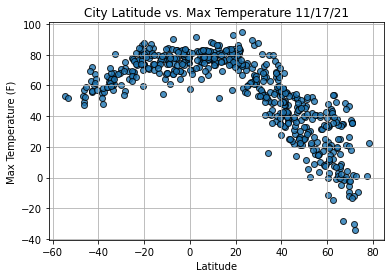

In [96]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

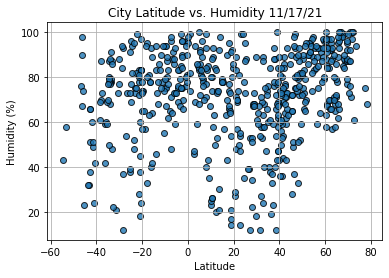

In [97]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

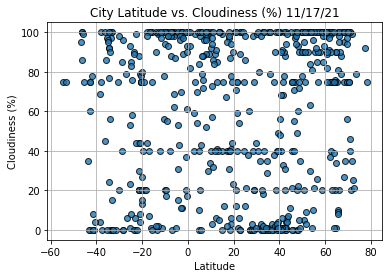

In [98]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

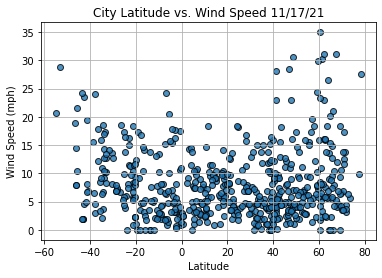

In [99]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [100]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [101]:
index13 = city_data_df.loc[13]
index13

City                       Lipari
Lat                       38.4674
Lng                        14.954
Max Temp                    59.22
Humidity                       66
Cloudiness                    100
Wind Speed                  15.26
Country                        IT
Date          2021-11-16 21:37:16
Name: 13, dtype: object

In [102]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
563     True
564    False
565     True
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [103]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pionerskiy,54.9508,20.2275,40.84,83,21,9.53,RU,2021-11-16 21:37:13
5,Khatanga,71.9667,102.5000,-34.02,100,25,3.22,RU,2021-11-16 21:37:14
6,Saint George,37.1041,-113.5841,75.67,23,1,1.01,US,2021-11-16 21:37:14
8,Solnechnyy,50.7214,136.6319,11.25,83,5,4.05,RU,2021-11-16 21:37:15
10,Nome,64.5011,-165.4064,3.16,71,1,0.00,US,2021-11-16 21:37:15


In [105]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

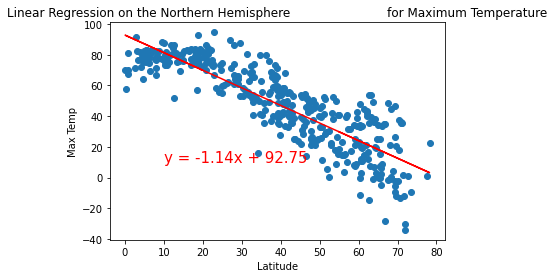

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

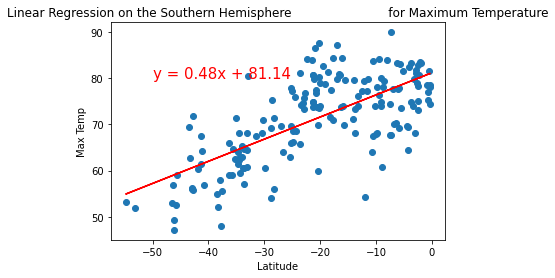

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

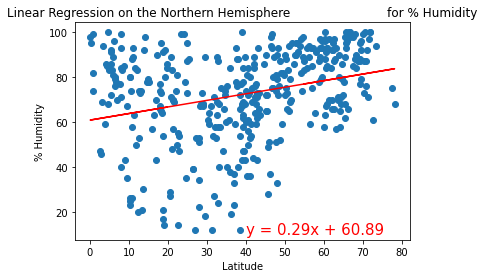

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

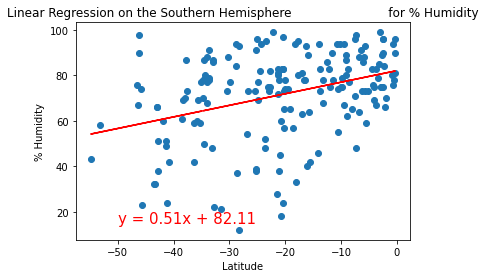

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

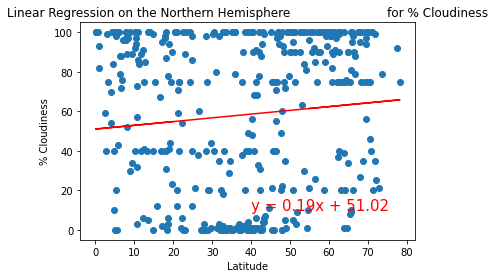

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

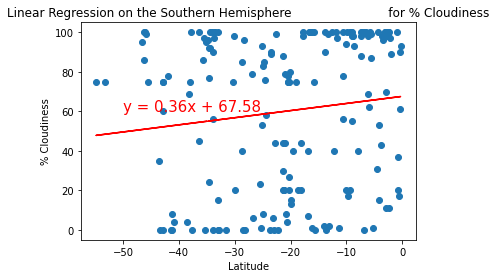

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

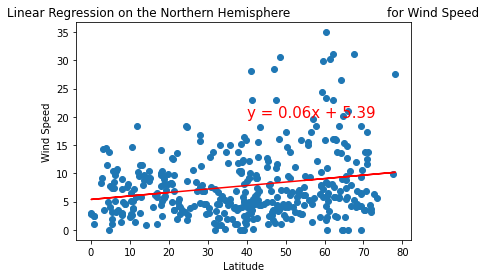

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

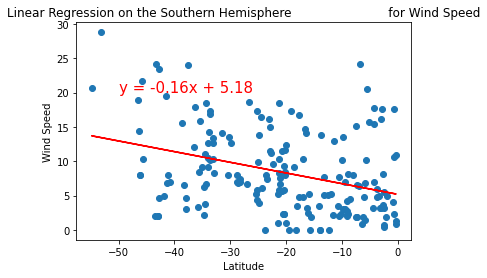

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))